In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris
import numpy as np

In [11]:
# 경고무시
import warnings
warnings.filterwarnings(action  = 'ignore')

# 교차검증
- cross_val_score, cross_validate
- 많이 사용하는 교차검증 방법
- 기능적으로 좋은 부분 : 자체적으로 데이터 타입이 회귀 또는 분류에 따라서 kf, skf 바꿔서 작업 해줌
- 데이터의 불균형이나 이런 것들 또는 타입에 따른 데이터 검증 방법을 생각할 필요 없어서 편하게 사용 가능
- cross_val_score(사용할 모델, x값, y값, scoring(평가할 스코어링 방법), cv(몇번 교차검증 할 것인가), n_jobs(cpu사용에 대한 지정), verbose(진행상황보기), fit_params 등)

In [5]:
iris_data = load_iris()
data= iris_data.data
label= iris_data.target

In [6]:
dt_clf = DecisionTreeClassifier(random_state=111)

In [7]:
#교차검증 진행
scores = cross_val_score(dt_clf, data, label, scoring='accuracy',cv=5)
print(np.round(np.mean(scores),3))

0.96


In [8]:
# cross validate
# 소요시간, train, test에 대한 내가 원하는 지표를 다 볼 수 있다.
crs=cross_validate(dt_clf, data, label, scoring='accuracy',cv=5, return_train_score=True)
crs

{'fit_time': array([0.00140047, 0.00303507, 0.00111485, 0.00102067, 0.00099969]),
 'score_time': array([0.00074935, 0.0015142 , 0.00054932, 0.00060058, 0.00057101]),
 'test_score': array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [9]:
import pandas as pd
pd.DataFrame(crs)

,fit_time,score_time,test_score,train_score
0,0.001400,0.000749,0.966667,1.0
1,0.003035,0.001514,0.966667,1.0
2,0.001115,0.000549,0.900000,1.0
3,0.001021,0.000601,0.966667,1.0
4,0.001000,0.000571,1.000000,1.0


In [10]:
scores

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

# Confusion Matrix
- 정확도, 정밀도, 재현율, f1 스코어, auc, roc 커브

In [13]:
scores = cross_val_score(dt_clf, data, label, scoring='precision',cv=5)
scores

array([nan, nan, nan, nan, nan])

In [15]:
scores = cross_val_score(dt_clf, data, label, scoring='f1',cv=5)
scores

array([nan, nan, nan, nan, nan])

- 왜 nan이 나올까???
- 정확도, 정밀도, 재현율, f1스코어, auc, roc커브 등 여러 지표들은 이진분류를 바탕으로 계산 진행
- BUT 아이리스 데이터는 다중분류!

# 다중분류 진행 시 정확도 외 다른 평가지표에 대한 가중치 설정 방법
- 다중분류시 평가지표를 확인하기 위해서는 _micro, _macro, _weighted 이런 식으로 사용
- macro : 모든 예측결과에 대해 평균을 내어서 값을 계산하는 방법
- micro : 각각의 정답에 대한 개수를 가지고 평균값을 구한다.
- weighted : 가중 평균값을 구한다. 가중치를 주고 싶은 것에 줄 수 있다

## macro, micro, weighted 예시
- 4개의 클래스로 분류 : 0,1,2,3 클래스 존재
- precision 값을 계산해보니
  - 0 0.5 = 1/2
  - 1 0.1 = 10/100
  - 2 0.5 = 1/2
  - 3 0.5 = 1/2
- macro :
  (0.5+0.1+0.5+0.5)/4 = 0.4
- micro :
  (1+10+1+1)/(2+100+2+2) = 0.1226
- 클래스에 대한 불균형에 따라서 두 개의 값을 다르게 사용
- 대부분 둘 다 사용하고 두 지표 보여주면서 이렇게 나왔습니다 하고 넘어가는 경우가 다수

### 그렇다면 둘의 차이는?
- 클래스 불균형일 때 영향도를 생각해서 사용!
  - 2,100,2,2 총 206개의 클래스에서
  - 랜덤하게 데이터를 뽑는다고 하면
  - 확률적으로 우리는 클래스 1을 뽑을 확률이 제일 높다.
  - 사기 탐지를 예시로 보면 대부분 정상이라 사기인 경우는 적다.
  - 대부분의 데이터는 정상 , 사기는 아주 희귀하게 한 두개 존재

In [16]:
#  _micro
scores = cross_val_score(dt_clf, data, label, scoring='precision_micro',cv=5)
scores

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

In [18]:
import seaborn as sns
df =sns.load_dataset('titanic')
df_tt=df[['pclass','fare']]
df_tt

,pclass,fare
0,3,7.2500
1,1,71.2833
2,3,7.9250
3,1,53.1000
4,3,8.0500
...,...,...
886,2,13.0000
887,1,30.0000
888,3,23.4500
889,1,30.0000


In [19]:
# accuracy 확인
scores = cross_val_score(dt_clf, df_tt, df['survived'], scoring='accuracy',cv=5)
print(np.round(np.mean(scores),3))
scores

0.688


array([0.62569832, 0.66853933, 0.68539326, 0.73033708, 0.73033708])

In [21]:
# f1 확인
scores = cross_val_score(dt_clf, df_tt, df['survived'], scoring='f1',cv=5)
scores

array([0.42735043, 0.4957265 , 0.53333333, 0.60655738, 0.61290323])

In [22]:
# precision 확인
scores = cross_val_score(dt_clf, df_tt, df['survived'], scoring='precision',cv=5)
scores

array([0.52083333, 0.59183673, 0.61538462, 0.68518519, 0.69090909])

# leaveOneOut 교차검증
- Group 교차검증
  - 그룹핑은 그룹핑 데이터를 가지고 교차검증을 할 때 더 좋은 성능을 보여줄 수 있다.
  - 단순하게 교차검증을 cross 하는게 아니라, 데이터의 특성을 보고 내가 분석할 것이 어떤 클래스 별의 수치를 비교하는 것이라면 교차검증 자체도 그룹핑으로 접근 할 수 있는 것


In [24]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores =cross_val_score(dt_clf, df_tt, df['survived'], scoring='accuracy',cv=loo)

In [25]:
print(len(scores))
print(scores.mean())

891
0.6745230078563412


In [26]:
## cross val 응용하기
model = [DecisionTreeClassifier(),RandomForestClassifier(),LogisticRegression()]
name = ['DT','RF','LR']

for model ,name in zip(model, name):
    print('******************사용한 알고리즘',name,'******************')
    for score in ['accuracy','precision','recall','f1']:
        print(score)
        print('--')
        print(cross_val_score(model, df_tt, df['survived'], scoring=score,cv=10))

******************사용한 알고리즘 DT ******************
accuracy
--
[0.67777778 0.61797753 0.64044944 0.66292135 0.6741573  0.71910112
 0.60674157 0.78651685 0.71910112 0.75280899]
precision
--
[0.63636364 0.5        0.54545455 0.59090909 0.6        0.63636364
 0.47826087 0.74193548 0.65517241 0.76      ]
recall
--
[0.4        0.35294118 0.35294118 0.38235294 0.44117647 0.61764706
 0.32352941 0.67647059 0.55882353 0.54285714]
f1
--
[0.49122807 0.4137931  0.42857143 0.46428571 0.50847458 0.62686567
 0.39285714 0.70769231 0.6031746  0.63333333]
******************사용한 알고리즘 RF ******************
accuracy
--
[0.7        0.59550562 0.68539326 0.68539326 0.68539326 0.68539326
 0.6741573  0.78651685 0.73033708 0.7752809 ]
precision
--
[0.66666667 0.45833333 0.58333333 0.5862069  0.61538462 0.62857143
 0.56       0.75       0.65517241 0.75      ]
recall
--
[0.48571429 0.38235294 0.47058824 0.52941176 0.47058824 0.64705882
 0.47058824 0.67647059 0.61764706 0.57142857]
f1
--
[0.56666667 0.43333333 0.5573

# 평가지표
- 분류, 회귀
- 둘 다 다르게 측정
- 딥러닝은 비용함수
- 우리는 ML에 대해서 분류, 회귀로 평가지표 확인!

## 분류
- 정확도, 정밀도, 재현율, f1 , roc
- 구성요소가 어떤 식으로 되어 있는 것이고
- 정밀도, 재현율의 차이가 어떤 상황에 맞는 것이고
- 왜 우리는 그래서 F1 스코어를 보는지?
- roc 커브에 x축과 y축이 의미하는 것은?

### 정확도
- 정확도 = 예측의 결과 (0,1) 동일한 데이터 건수 / 전체 예측 데이터 건수
- 맞춘다는 것이 1만 맞춘다는 것으로 생각하지만 0도 0으로 맞춘 것
- 0과 1을 둘 다 맞춘 것을 고민해야한다
- 정밀도, 재현율을 이해하려면 오차행렬 (confusion matrix)를 이해해야한다

### Confusion Matrix ( 이진분류가 디폴트)

[](https://)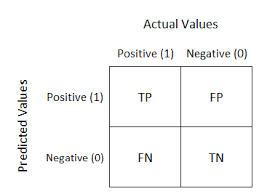